In [1]:
from spotXAI import spotXAI
from spotXAI import boxplot_attribution, scatter_attribution

from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.netlightregression import NetLightRegression
from spotpython.utils.classes import get_removed_attributes_and_base_net

from torch.nn import ReLU
import torch

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
seed = 121315
torch.manual_seed(seed)
np.random.seed(seed)

### Exemplary dictionary with the HP config for a network

In [4]:
example_config = {
    "l1": 64,
    "epochs": 1024,
    "batch_size": 32,
    "act_fn": ReLU(),
    "optimizer": "AdamW",
    "dropout_prob": 0.04938229888019609,
    "lr_mult": 2.3689895017756495,
    "patience": 64,
    "initialization": "Default",
}

### Building the spot Lightning Architecture

In [5]:
model = NetLightRegression(**example_config, _L_in=10, _L_out=1, _torchmetric="mean_squared_error")

#### Usage of `get_removed_attributes_and_base_net` to transform the Lightning module to a plain pyTorch module

Hint: The remaining training attributes will be later used for the analyzer. This dictionary includes parameters that are relevant for the training of the model like batch size, epochs, optimizer or loss function

In [6]:
removed_attributes, torch_net = get_removed_attributes_and_base_net(net=model)
removed_attributes

{'_automatic_optimization': True,
 '_example_input_array': tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0.

In [7]:
torch_net

NetLightRegression(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.04938229888019609, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.04938229888019609, inplace=False)
    (6): Linear(in_features=32, out_features=32, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.04938229888019609, inplace=False)
    (9): Linear(in_features=32, out_features=16, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.04938229888019609, inplace=False)
    (12): Linear(in_features=16, out_features=1, bias=True)
  )
)

### Select a data set

In [8]:
dataset = Diabetes(target_type=torch.float)

### Define the analyzer by handing over the generated model, the data set, a train split ratio and the dictionary consisting of the "removed attributes"


In [9]:
analyzer = spotXAI(model=torch_net, data=dataset, train_split=0.6, training_attributes=removed_attributes, seed=seed)

#### Train the weights of the model

In [10]:
analyzer.train_model()

epochs 1/1024
train loss:  905.915771484375
epochs 2/1024
train loss:  884.4952392578125
epochs 3/1024
train loss:  885.1492919921875
epochs 4/1024
train loss:  870.7852783203125
epochs 5/1024
train loss:  810.073486328125
epochs 6/1024
train loss:  655.7811889648438
epochs 7/1024
train loss:  440.5362854003906
epochs 8/1024
train loss:  223.6554718017578
epochs 9/1024
train loss:  200.88975524902344
epochs 10/1024
train loss:  160.4599609375
epochs 11/1024
train loss:  144.8616943359375
epochs 12/1024
train loss:  130.19781494140625
epochs 13/1024
train loss:  124.62855529785156
epochs 14/1024
train loss:  119.61485290527344
epochs 15/1024
train loss:  122.69522094726562
epochs 16/1024
train loss:  109.99818420410156
epochs 17/1024
train loss:  105.17195892333984
epochs 18/1024
train loss:  111.99007415771484
epochs 19/1024
train loss:  101.03746032714844
epochs 20/1024
train loss:  97.34871673583984
epochs 21/1024
train loss:  95.84896850585938
epochs 22/1024
train loss:  96.49319458

#### Perform the attribution analysis

In [11]:
# baseline = torch.Tensor([[0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.2,0.1, 0.2]])
df = analyzer.get_n_most_sig_features(n_rel=10, attr_method="KernelShap", baseline=None, abs_attr=True)

In [12]:
df

,Feature Index,KernelShapAttribution
0,4,-3293.019775
1,1,2534.480225
2,8,1225.748779
3,6,-1130.974487
4,7,787.576538
5,9,692.951843
6,3,-438.659821
7,5,341.686157
8,0,319.188965
9,2,18.936253


#### Plot the results

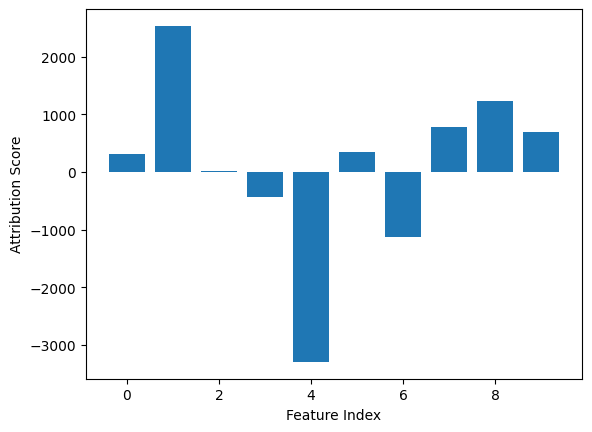

In [13]:
plt.bar(df["Feature Index"], df["KernelShapAttribution"])
plt.xlabel("Feature Index")
plt.ylabel("Attribution Score")
plt.show()

### Perform layer conductance analysis

In [14]:
lc_val = analyzer.get_layer_conductance(layer_idx=12)

Conductance analysis for layer:  Linear(in_features=16, out_features=1, bias=True)


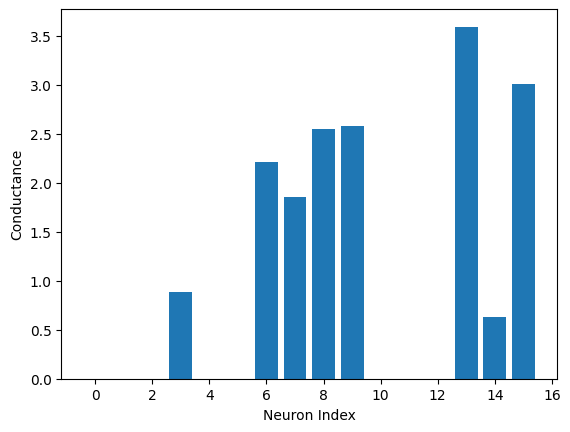

In [15]:
plt.bar(range(len(lc_val)), lc_val)
plt.xlabel("Neuron Index")
plt.ylabel("Conductance")
plt.show()

### Check the distribution of all attribution values

In [16]:
df_attribution_distribution = analyzer.get_attribution_distribution(attr_method="FeatureAblation", abs_attr= False)

In [17]:
import pandas as pd
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.expand_frame_repr', False)
df_attribution_distribution

,attribution value,feature index,corresponding y_value
0,4.311707,0,237.0
1,23.367569,1,237.0
2,17.709320,2,237.0
3,6.011932,3,237.0
4,-32.167389,4,237.0
...,...,...,...
1755,18.756958,5,84.0
1756,-65.871422,6,84.0
1757,2.612381,7,84.0
1758,-13.930809,8,84.0


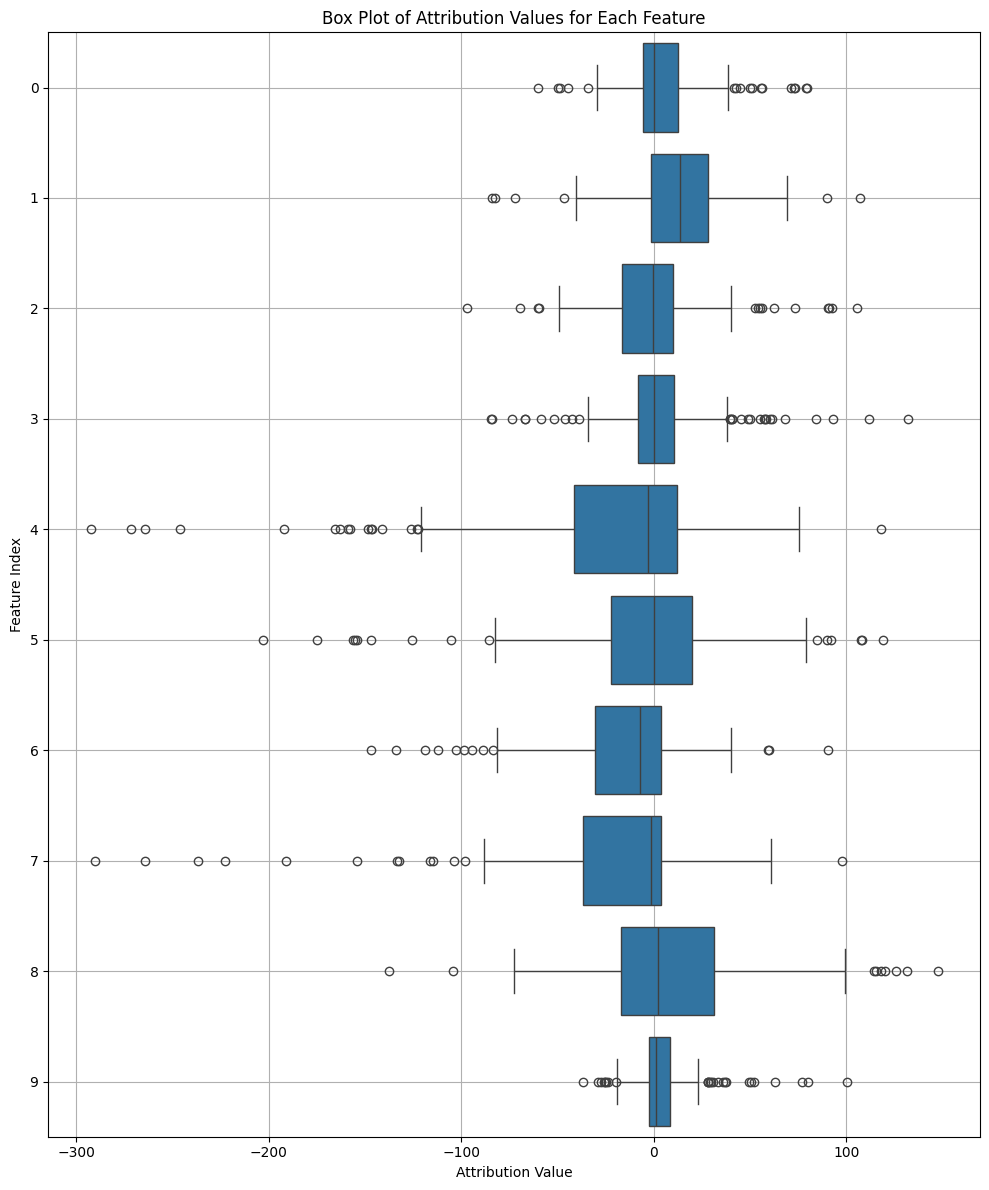

In [18]:
boxplot_attribution(df_attribution_distribution, size = (10,12), attr_filter=None)

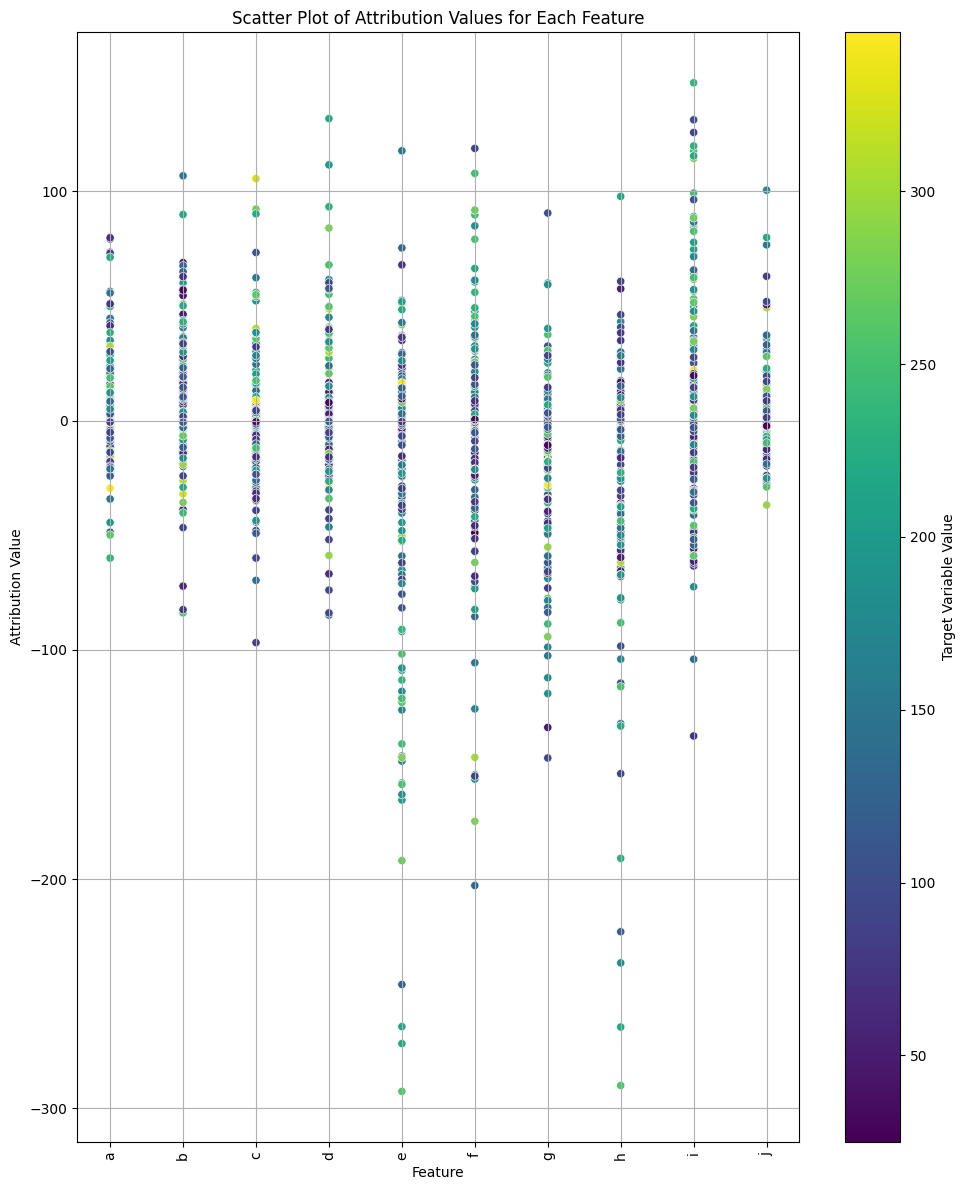

In [20]:
list = ["a","b","c","d","e","f","g","h","i","j"]
scatter_attribution(df_attribution_distribution, size = (10,12), attr_filter=None, param_list=list)